# Customer Churn Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('/Users/manojnath/Library/Containers/com.microsoft.Excel/Data/Downloads/Customer Churn.xlsx')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices


In [4]:
df.shape

(7043, 30)

# Data Cleaning

In [5]:
#Checking data types of all the column
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Reason          object
dtype: object

In [6]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

In [9]:
100*df['Churn Label'].value_counts()/len(df['Churn Label'])

No     73.463013
Yes    26.536987
Name: Churn Label, dtype: float64

##### Data is highly imbalanced, ratio = 73:27
#### So we analyse the data with other features while taking the target values separately to get some insights.

In [10]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Reason         5174
dtype: int64

Here Churn Reason is subjective. So we can ignore this column.

In [11]:
# Dropping unnecessary columns
df.drop(columns=['CustomerID','Count','Country','State','Zip Code','Lat Long','Latitude','Longitude','Churn Reason','City'],axis=1,inplace=True)

In [12]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [14]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label'],
      dtype='object')

# Exploratory Data Analysis

### 1. Churn by Gender

Text(0.5, 1.0, 'Churn by gender')

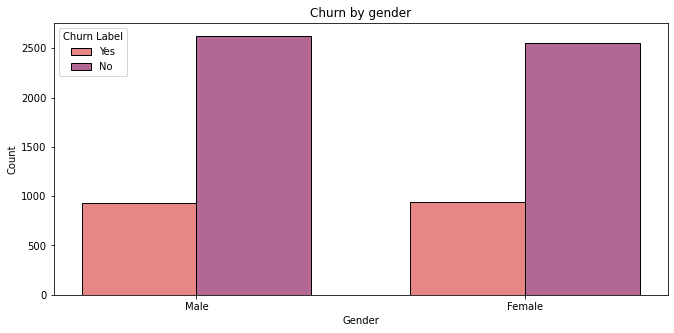

In [15]:
plt.figure(figsize=(11,5))
sns.histplot(data=df, x="Gender", hue="Churn Label", multiple="dodge", palette ='flare',shrink=.7)
plt.title('Churn by gender')

Looking at the above figure,  we can see that churn is equal in males and females.

### 2. Churn by Senior Citizen

Text(0.5, 1.0, 'Churn by Senior Citizen')

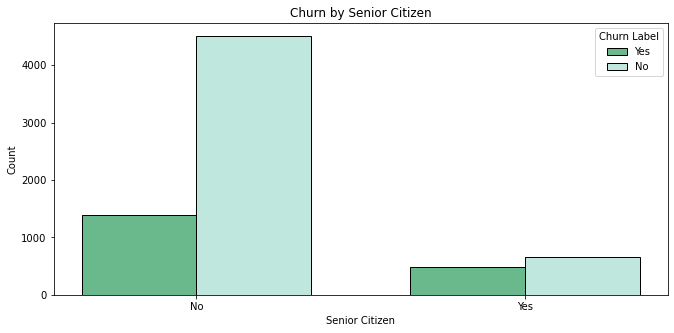

In [16]:
plt.figure(figsize=(11,5))
sns.histplot(data=df, x="Senior Citizen", hue="Churn Label", multiple="dodge", palette ='BuGn_r',shrink=.7)
plt.title('Churn by Senior Citizen')

Senior Citizen is a binary feature that indicates whether the customer is an elderly person or not (Yes or No). Here we can see that Churn in Senior citizens is lesser than that in case of non-senior citizens.

### 3. Churn by Partner

Text(0.5, 1.0, 'Churn by Partner')

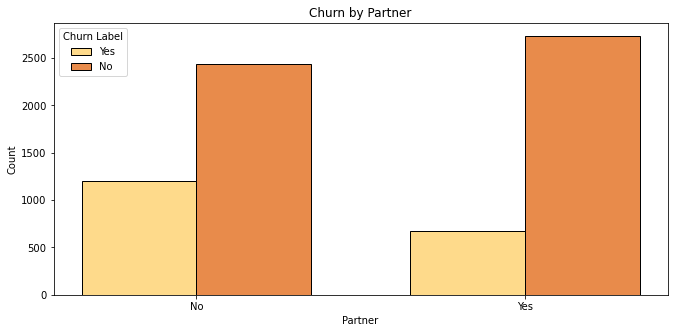

In [17]:
plt.figure(figsize=(11,5))
sns.histplot(data=df, x="Partner",hue="Churn Label", multiple="dodge", palette ='YlOrBr',shrink=.7)
plt.title('Churn by Partner')

Partner is a binary feature that indicates whether the customer has a partner or not (Yes or No). So we can see that Churn in customers with Partner is lesser than the ones without any partner.

### 4. Churn by Dependent Feature

Text(0.5, 1.0, 'Dependents Feature')

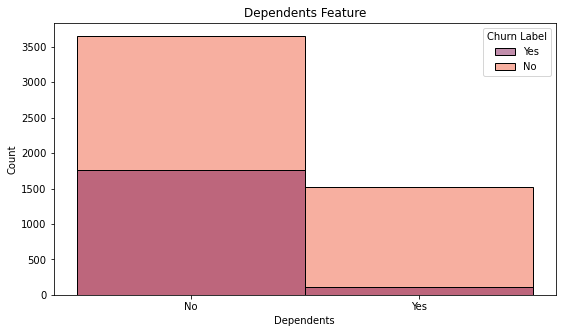

In [18]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="Dependents",hue='Churn Label', palette='rocket')
plt.title('Dependents Feature')

The Dependents feature is a binary variable that tells whether the customer has a dependent or not. Here, we can see that Customers having dependents have significantly less churn than customers without dependents.

### 5. Churn by Tenure Group

Text(0.5, 1.0, 'Tenure Months')

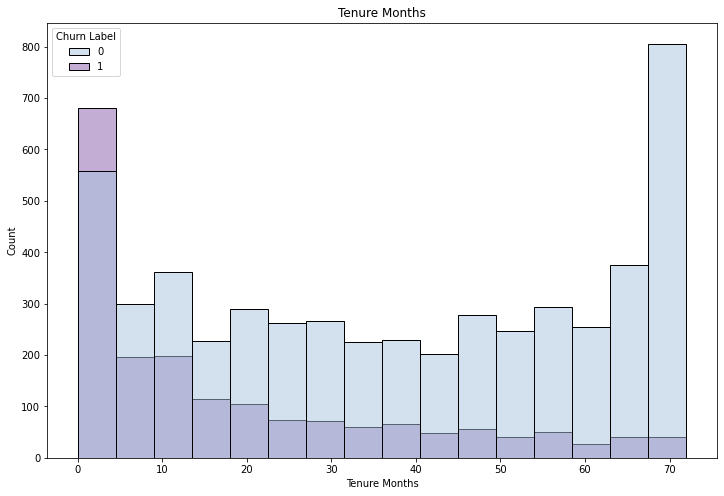

In [78]:
plt.figure(figsize=(12,8))
sns.histplot(data=df,x="Tenure Months",hue='Churn Label', palette='BuPu')
plt.title('Tenure Months')

Here, we can see more churn in customers with less tenure (in months).

### 6. Churn by Contract Service

Text(0.5, 1.0, 'Contract Service')

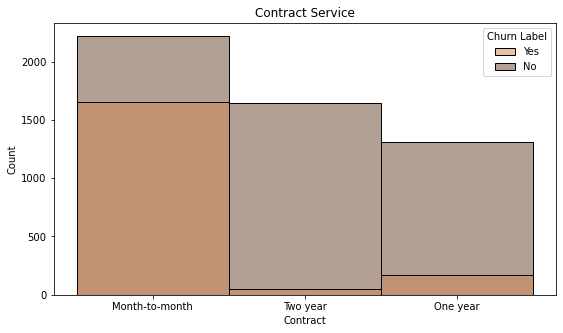

In [20]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="Contract",hue='Churn Label', palette='copper_r')
plt.title('Contract Service')

The contract variable tells how long the individual has been a customer. There are three types of contract ; Month-to-month , Two years and one year. In above figure, we can see that those who have month-to-month contract have highest churn followed by One and Two year Contracts, respectively.

### 7. Churn by Payment Method

Text(0.5, 1.0, 'Payment Method')

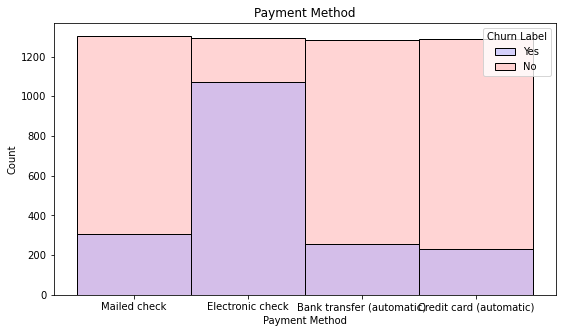

In [21]:
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="Payment Method",hue='Churn Label', palette='bwr')
plt.title('Payment Method')

In the above figure, we can see churn is most in Electronic check methods.

### 8. Churn by Miscellaneous Variables

<AxesSubplot:xlabel='Online Security', ylabel='Count'>

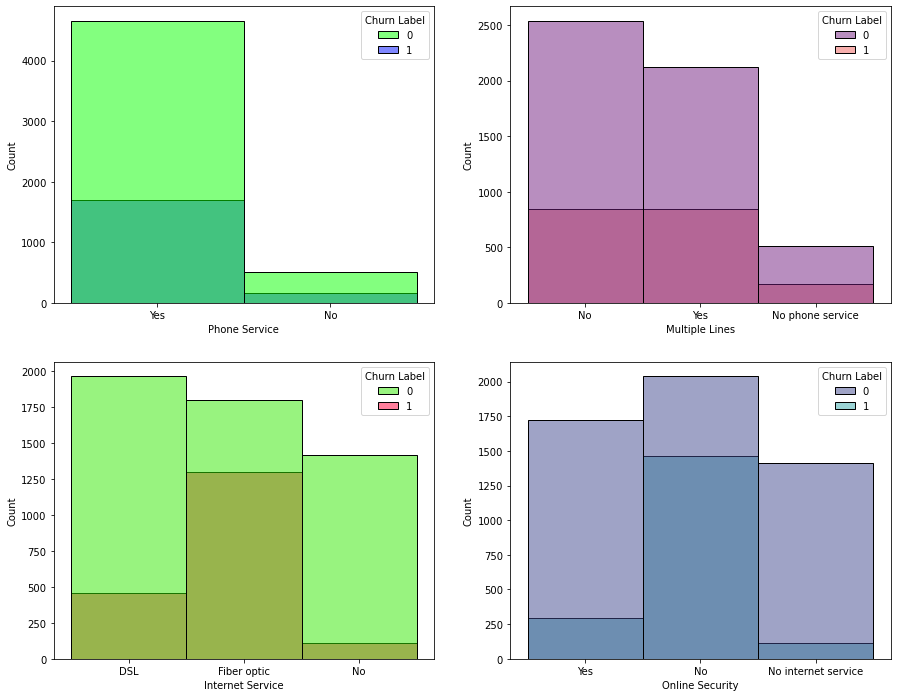

In [80]:
fig, ax = plt.subplots(2, 2,figsize=(15,12))
sns.histplot(data=df,x="Phone Service",hue='Churn Label', palette='hsv',ax=ax[0,0])
sns.histplot(data=df,x="Multiple Lines",hue='Churn Label', palette='magma',ax=ax[0,1])
sns.histplot(data=df,x="Internet Service",hue='Churn Label', palette='prism',ax=ax[1,0])
sns.histplot(data=df,x='Online Security',hue='Churn Label', palette='mako',ax=ax[1,1])

* Customer who has phone service are more likely to churn.
* Customer who has multiple lines is slightly more likely to churn.
* If customer's Internet service provider is Fiber optic, then that customer is more likely to churn.
* Customer who does not have online security is more likely to churn.

<AxesSubplot:xlabel='Streaming TV', ylabel='Count'>

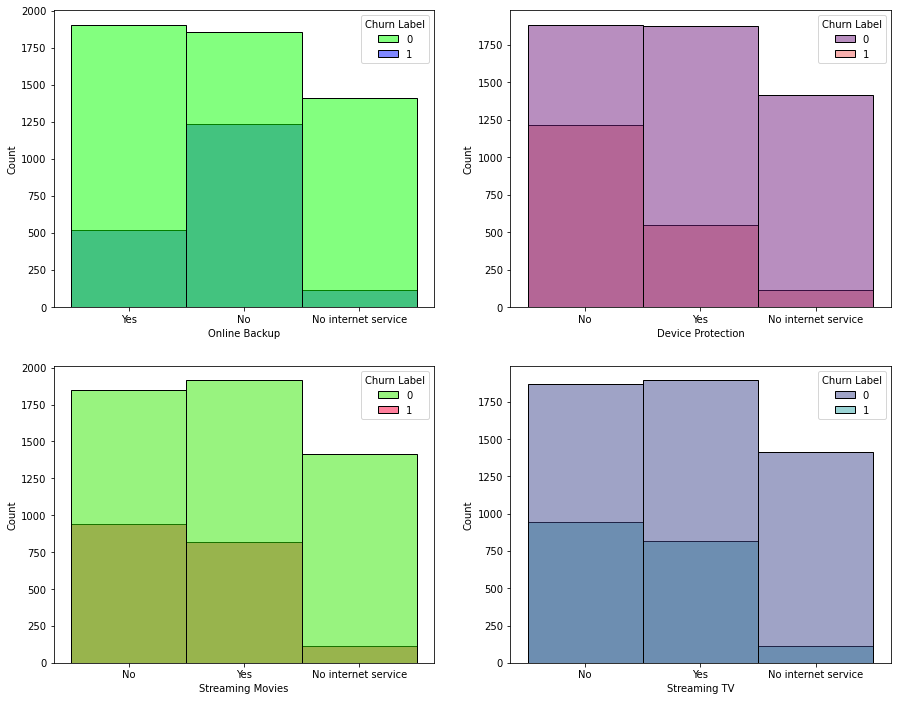

In [95]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
sns.histplot(data=df,x="Online Backup",hue='Churn Label', palette='hsv',ax=ax[0,0]) 
sns.histplot(data=df,x="Device Protection",hue='Churn Label', palette='magma',ax=ax[0,1])
sns.histplot(data=df,x="Streaming Movies",hue='Churn Label', palette='prism',ax=ax[1,0])
sns.histplot(data=df,x='Streaming TV',hue='Churn Label', palette='mako',ax=ax[1,1])

* Customer who does not have online backup is more likely to churn.
* Customer who does not have device protection is more likely to churn.
* Streaming Movies and Streaming TV have same effect of Churn rate.


<AxesSubplot:xlabel='Tech Support', ylabel='Count'>

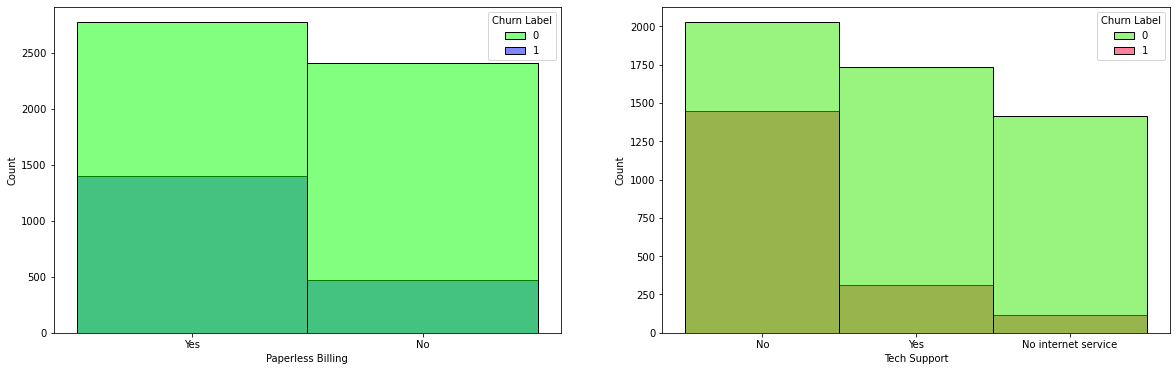

In [96]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
sns.histplot(data=df,x="Paperless Billing",hue='Churn Label', palette='hsv',ax=ax1) 
sns.histplot(data=df,x="Tech Support",hue='Churn Label', palette='prism',ax=ax2)

* Customer who does not have tech support is more likely to churn.
* Customer who has paperless billing is more likely to churn.

# Model Comparison

#### Converting all categorical variable into numerical variable

In [22]:
df['Churn Label'] = df['Churn Label'].map({'Yes':1 ,'No':0})

In [23]:
X = df.drop(columns=["Churn Label"]).copy() 
y = df["Churn Label"].copy()

In [24]:
cat_col = [col for col in X.columns if X[col].dtype == 'object']
num_col = [col for col in X.columns if X[col].dtype == 'int']

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_col:
        X[col] = label_encoder.fit_transform(X[col].astype(str))

In [27]:
X.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
2,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104
3,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,4265


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Label, dtype: int64

In [29]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [30]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## 1. Decision Tree Classifier

In [31]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [32]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [33]:
y_pred=model_dt.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [34]:
model_dt.score(X_test,y_test)

0.7849538679914834

In [35]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1029
           1       0.68      0.38      0.49       380

    accuracy                           0.78      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.78      0.76      1409



As we can see in the above Decision Tree model, the accuracy is quite low (78%), and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model.

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. Churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [38]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [39]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [40]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [41]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9304274937133278
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       526
           1       0.95      0.93      0.94       667

    accuracy                           0.93      1193
   macro avg       0.93      0.93      0.93      1193
weighted avg       0.93      0.93      0.93      1193



In [62]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[490  36]
 [ 47 620]]


After SMOTEENNing, now we can see quite better results, i.e. Accuracy: 93.04 %, and a very good recall, precision & f1 score for minority class.

Let's try with some other classifier.

# 2. Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=6, min_samples_leaf=8)

In [46]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8)

In [48]:
y_pred=model_rf.predict(X_test)

In [59]:
model_rf.score(X_test,y_test)

0.7984386089425124

In [50]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1029
           1       0.68      0.48      0.56       380

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [52]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [53]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [54]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=6, min_samples_leaf=8)

In [60]:
model_rf_smote.fit(xr_train1,yr_train1)
yr_predict1 = model_rf_smote.predict(xr_test1)
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9297071129707113
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       560
           1       0.92      0.95      0.93       635

    accuracy                           0.93      1195
   macro avg       0.93      0.93      0.93      1195
weighted avg       0.93      0.93      0.93      1195



In [61]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[507  53]
 [ 31 604]]


With Random Forest Classifier, we are getting good accuracy but not as accurate as we found in Decision Tree after Smoteenn. 

# 3. Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lm = LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs')

In [65]:
lm.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [66]:
y_pred = lm.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1029
           1       0.65      0.55      0.59       380

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [68]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(X,y)

In [69]:
xr_train2,xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size=0.2)

In [70]:
model_lr_smote=LogisticRegression(random_state=0, max_iter=1000, solver='lbfgs')

In [71]:
model_lr_smote.fit(xr_train2,yr_train2)
yr_predict2 = model_lr_smote.predict(xr_test2)
model_score_r1 = model_lr_smote.score(xr_test2, yr_test2)
print(model_score_r1)
print(metrics.classification_report(yr_test2, yr_predict2))

0.9307756463719766
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       547
           1       0.94      0.94      0.94       652

    accuracy                           0.93      1199
   macro avg       0.93      0.93      0.93      1199
weighted avg       0.93      0.93      0.93      1199



Logistic Regression model accuracy (93.07%) is almost similar to Decision Tree Model (93.04%). So we can go with either of the two.  

Let's go ahead with *Logistic Regression Model* and save the model for further use.

# Saving the Model

In [73]:
import pickle

In [74]:
filename = 'model.sav'
pickle.dump(model_lr_smote, open(filename, 'wb'))

In [75]:
load_model = pickle.load(open(filename, 'rb'))

In [76]:
model_score_r1 = load_model.score(xr_test2, yr_test2)

In [77]:
model_score_r1

0.9307756463719766

Our final model i.e. *Logistic Regression with SMOTEENN*, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.